
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [5]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [6]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


# 

# Punto a)

## Las visualizaciones puede ser:

1. Grafico de dispersion
2. Graficos de barras
3. Graficos boxenplot

## Variables numericas:
1. salary_satisfaction
2. work_years_in_company
3. profile_years_experience

## Variables categoricas
1. profile_gender
2. work_has_violence_situations

In [10]:
df['lang_count'] = df.cured_programming_languages.apply(len)

## Satisfaccion del salario en relacion a los años de trabajo

<Figure size 1440x1440 with 0 Axes>

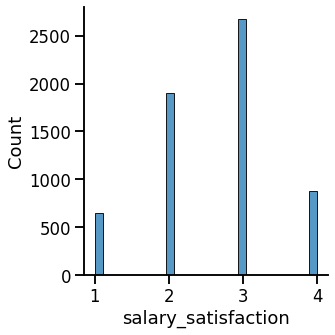

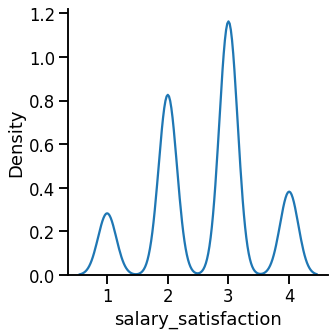

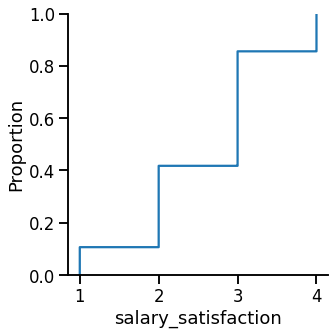

In [11]:
plt.figure(figsize=(20,20))
sns.displot( data = df, x = "salary_satisfaction")
sns.displot(x = "salary_satisfaction", data = df, kind="kde")
sns.displot(df, x="salary_satisfaction", kind="ecdf")

### Podemos ver por los 3 graficos anteriores, que la mayoria de los entrevistados,  tiene un alto nivel de satisfaccion con su salario actual. Veamos ahora con respecto a sus años de trabajo actuales.

<AxesSubplot:xlabel='salary_satisfaction', ylabel='work_years_in_company'>

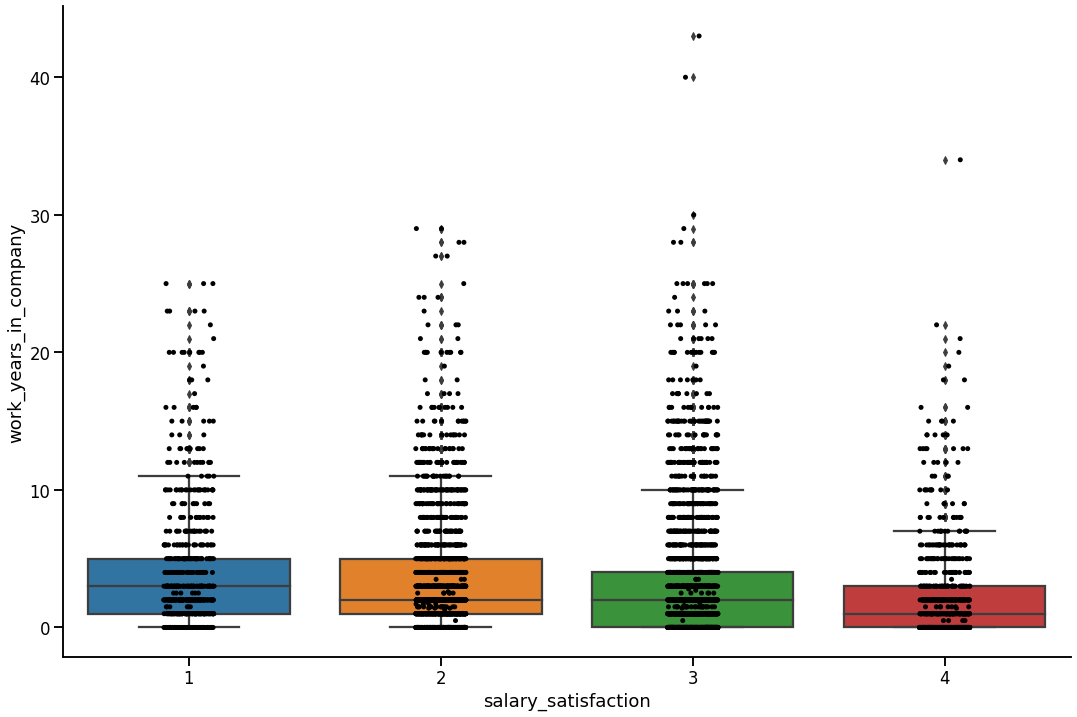

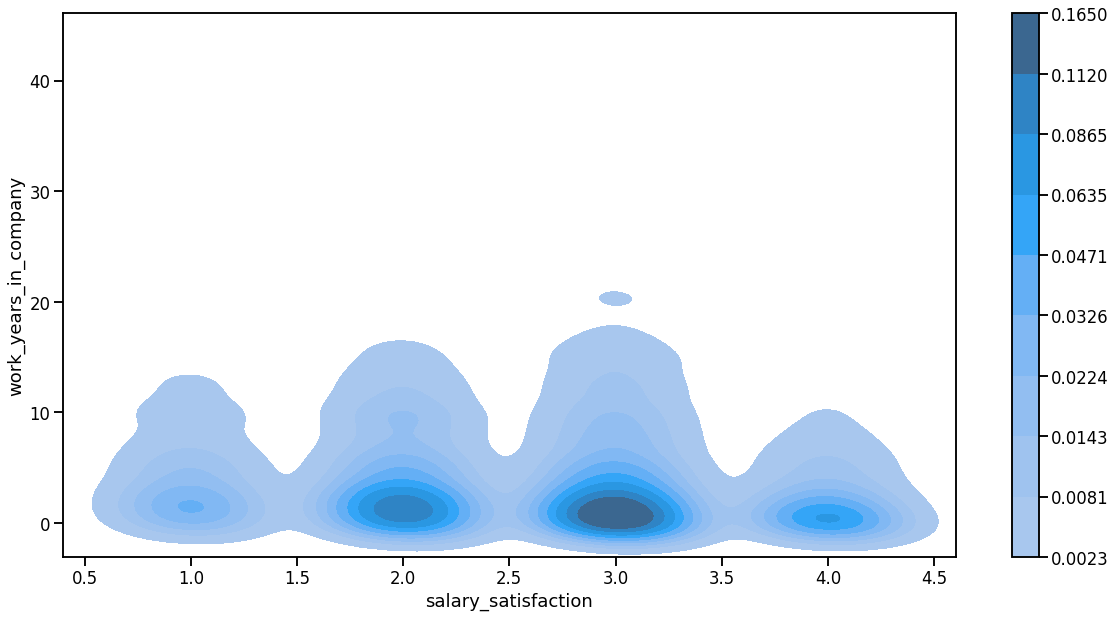

In [12]:
#plt.figure(figsize=(20,10))
#sns.scatterplot(x = "salary_satisfaction", y = "work_years_in_company", data = df )
sns.catplot(x="salary_satisfaction", y="work_years_in_company",
            height=10, # make the plot 5 units high
            aspect=1.5,
            color = "black",
            data=df)

sns.boxplot(x = "salary_satisfaction", y = "work_years_in_company", data = df)

plt.figure(figsize=(20,10))
sns.kdeplot(data = df, x = "salary_satisfaction", y = "work_years_in_company", fill = True, cbar = True)

### Podemos ver que aquellos que transcurren sus primeros años en las empresas, tiene una buena satisfaccion con respecto al salario.
### Las personas con mas de 20 años en la empresa, no sienten una maxima satisfaccion por su salario.
### Pero en general, la mayoria de las personas tienen una buena satisfaccion con respecto al salario.

# Veamos ahora las variables categoricas. Analicemos la violencia en el trabajo.

In [13]:
# Chequeamos que los datos no tengan errores
df.work_has_violence_situations.unique()
# Vemos que existe NaN en algunas filas, como no afectan el borrado de esas filas, lo hacemos
data_for_gender_analysis = df.copy()
#data_for_gender_analysis.work_has_violence_situations.unique()
data_for_gender_analysis.dropna(subset = ['work_has_violence_situations'], inplace=True)
data_for_gender_analysis.work_has_violence_situations.isna().sum()


0

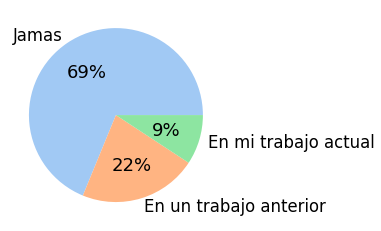

In [14]:
#1. profile_gender
#2. work_has_violence_situations

data_for_pie_plot = data_for_gender_analysis.work_has_violence_situations.value_counts().to_frame().reset_index()
data_for_pie_plot.rename(columns = {"index" : " Violence", "work_has_violence_situations" : "Quantity"}, inplace = True)
labels = ["Jamas", "En un trabajo anterior", "En mi trabajo actual"]
colors = sns.color_palette('pastel')[0:3]

plt.pie(data_for_pie_plot["Quantity"], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()



### Podemos ver que el 31% de las personas encuentadas sufre o sufrio violencia laboral.

# Veamos que genero sufre mas violencia:

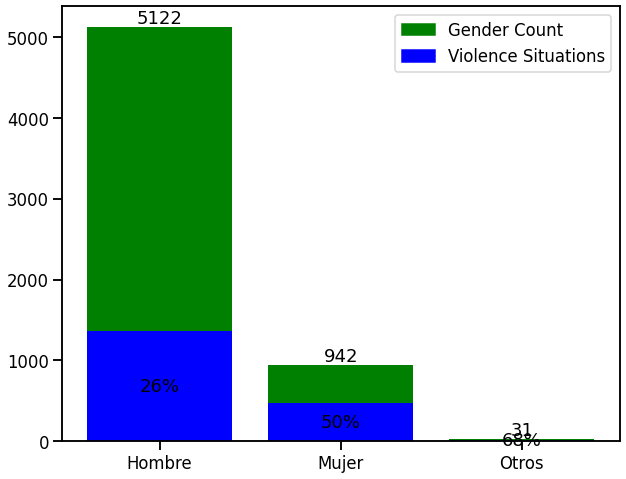

In [15]:
violence_per_gender = data_for_gender_analysis[data_for_gender_analysis["work_has_violence_situations"] != "Jamás" ]
violence_per_gender = violence_per_gender.groupby("profile_gender")["work_has_violence_situations"].count().to_frame().reset_index()
violence_per_gender.rename(columns = {"profile_gender" : "gender", "work_has_violence_situations":"violence_situations"}, inplace = True)

gender_count = df.profile_gender.value_counts().to_frame().reset_index()
gender_count.rename(columns = {"index" : "gender", "profile_gender":"total_quantity"}, inplace = True)

violence_per_gender = pd.merge(left = violence_per_gender,
                               right = gender_count,
                               how = "left",
                               left_on = "gender",
                               right_on = "gender")
#print(gender_count)
#print(violence_per_gender)

fig, ax = plt.subplots()
plt1 = ax.bar(violence_per_gender["gender"], violence_per_gender["total_quantity"], color = 'green')
plt2 = ax.bar(violence_per_gender["gender"], violence_per_gender["violence_situations"], color = 'blue')
#26 y 50

violence_percentage = ["26%", "50%", "68%"]
ax.bar_label(plt1, label_type = 'edge')
ax.bar_label(plt2, violence_percentage, label_type = 'center')

gender_count_plot = mpatches.Patch(color='green', label='Gender Count')
violence_situations = mpatches.Patch(color='blue', label='Violence Situations')
ax.legend(handles=[gender_count_plot, violence_situations])

fig.set_figheight(8)
fig.set_figwidth(10)

#a1x = sns.barplot(x = "gender", y = "violence_situations", data = violence_per_gender, color = 'b')
#a2x = sns.barplot(x = "gender", y = "total_quantity", data = violence_per_gender, color = 'r')
#plt.xlabel('Gender')
#plt.ylabel('Quantity')

### A simple vista se puede ver que los hombres sufren mas de violencia laboral que los demas generos. Pero analizando la cantidad de encuestas respondidas, dentro de los generos binarios  vemos que casi la mitad de las mujeres que han respondido, sufren o sufrieron violencia en el trabajo.
### Vemos que el 68% de las personas no binarias vivieron violencia laboral.
### Por lo tanto, podemos decir que el genero femenino es el que mas sufre de violencia laboral, por la poca cantidad de datos que tenemos de las encuestas respondidas por el genero no binario.

# 

# Punto b)

##  Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría


### Veamos la covarianza entre las dos variables:

In [16]:
check_cov_corr = df.copy()
cov =  check_cov_corr[["salary_monthly_BRUTO", "salary_monthly_NETO"]].cov()
cov

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.510745e+10,9.742525e+09
salary_monthly_NETO,9.742525e+09,9.382297e+09


## Si bien no podemos sacar una conclusion de los valores encontrados por la covarianza, debido a que dependen criticamente de la escala, graficaremos el modelo para encontrar si es positiva, negativa o nula.

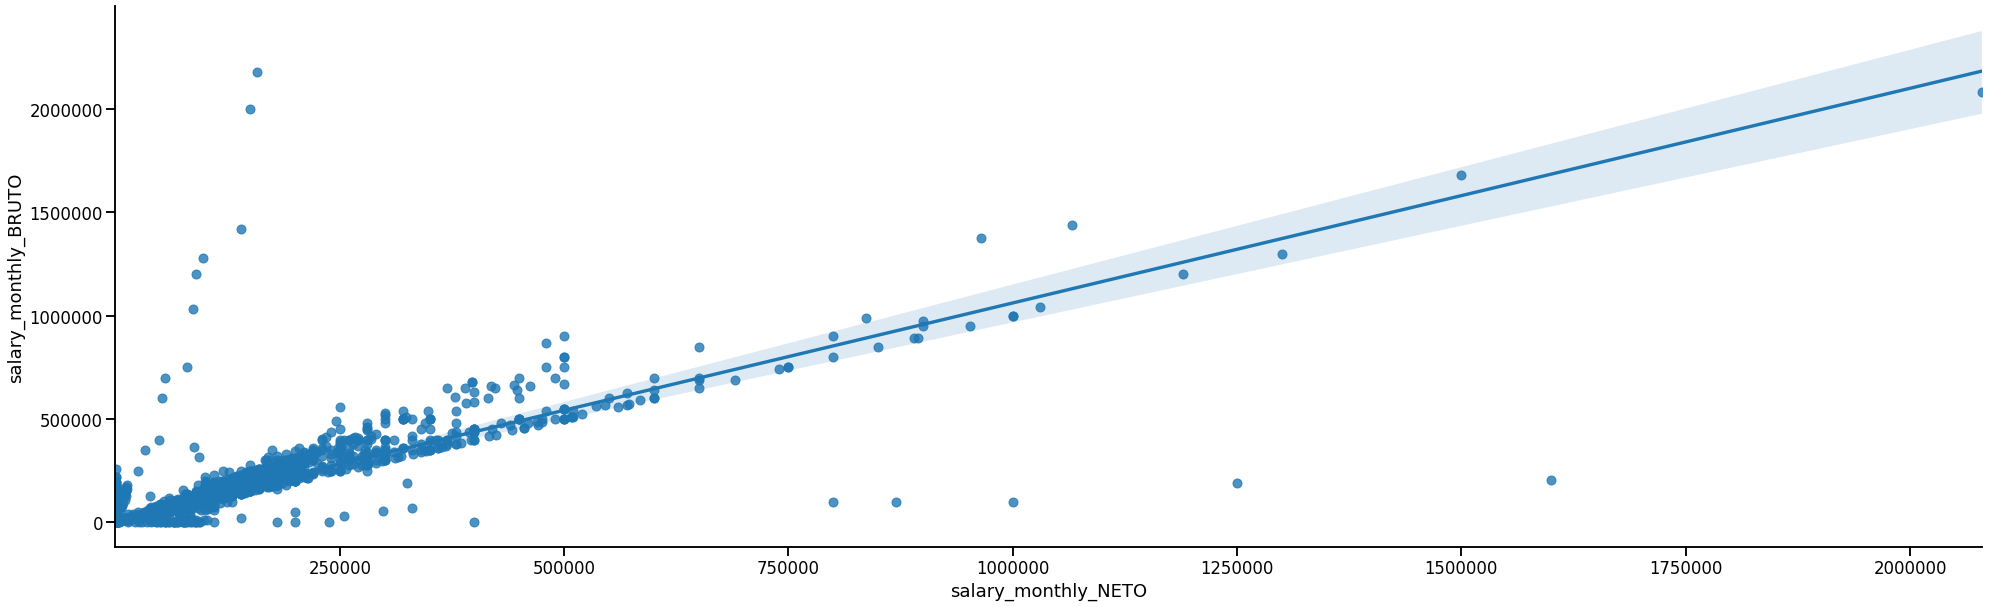

In [17]:
sns.lmplot(x="salary_monthly_NETO", 
                y="salary_monthly_BRUTO", 
                data=check_cov_corr,
               height = 9,
               aspect = 3)
plt.ticklabel_format(style='plain', axis= 'x')
plt.ticklabel_format(style='plain', axis='y')

## Vemos que es creciente, entonces existe una relacion entre las dos variables de tipo positiva

### 

### Veamos la correlacion entre las dos variables:

In [18]:
# Utilizamos la correlacion de Pearson, debido a que nuestros datos estan relacionados de una manera lineal.
corr =  check_cov_corr[["salary_monthly_BRUTO", "salary_monthly_NETO"]].corr()
corr

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.833335
salary_monthly_NETO,0.833335,1.000000


## Podemos decir que existe una alta correlacion positiva entre estos dos salarios

#  

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

In [19]:
df.profile_studies_level.value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

### Las dos subpoblaciones mas numerosas son: Universitario y Terciario.

Text(0.5, 1.0, 'Distribución de los sueldos acorde al nivel de estudio')

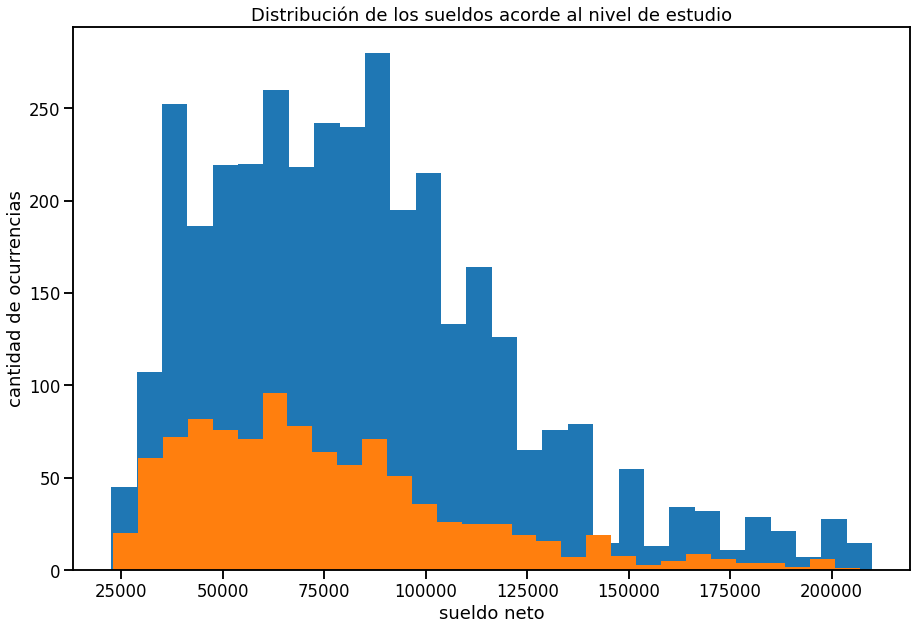

In [20]:
filtered_df_by_studies = df.copy()

filtered_df = df[df['salary_monthly_NETO'].notnull()]

interesting_range = filtered_df['salary_monthly_NETO'].quantile([.05, .95])
min_values = interesting_range.values[0]
max_values = interesting_range.values[1]
filtered_df = filtered_df[filtered_df['salary_monthly_NETO'].between(min_values, max_values)]
df_universitario = filtered_df[filtered_df['profile_studies_level'] == 'Universitario']
df_terciario = filtered_df[filtered_df['profile_studies_level'] == 'Terciario']

plt.figure(figsize=(15,10))
plt.hist(df_universitario['salary_monthly_NETO'], bins = 30, label = 'Universitario')
plt.hist(df_terciario['salary_monthly_NETO'], bins = 30, label = 'Terciario')
plt.xlabel("sueldo neto")
plt.ylabel("cantidad de ocurrencias")
plt.title("Distribución de los sueldos acorde al nivel de estudio")
#plt.show()



### Veamos la correlacion entre las dos variables 

In [52]:
correlation = pd.DataFrame()
correlation["sueldos_universitarios"] = df_universitario['salary_monthly_NETO']
correlation["sueldos_terciarios"] = df_terciario['salary_monthly_NETO'].reset_index(drop = True)


#df_universitario['salary_monthly_NETO']

#df_terciario['salary_monthly_NETO']


correlation.corr()

,sueldos_universitarios,sueldos_terciarios
sueldos_universitarios,1.000000,0.002367
sueldos_terciarios,0.002367,1.000000


### Si bien tenemos una correlacion baja. El analisis puede no ser concluyente, debido a que no sabemos cuantos universitarios hicieron un terciario. 

# 

## Medidas de centralizacion o posicion o localizacion:

### Media o promedio:

In [69]:
mean_of_salaries = correlation.mean().to_frame().reset_index()
mean_of_salaries.rename(columns = {'index':'Salary', 0:'Mean'}, inplace = True)
mean_of_salaries
#sns.barplot(x = 'Salary', y = 'Mean', data = mean_of_salaries)

,Salary,Mean
0,sueldos_universitarios,83931.065477
1,sueldos_terciarios,75919.078003


### Mediana:

In [67]:
median_of_salaries = correlation.median().to_frame().reset_index()
median_of_salaries.rename(columns = {'index':'Salary', 0:'Median'}, inplace = True)
median_of_salaries

,Salary,Median
0,sueldos_universitarios,80000.0
1,sueldos_terciarios,70000.0


### Cuartiles 25% y 75%:

In [76]:
quantile_25 = correlation.quantile(0.25).to_frame().reset_index()
quantile_75 = correlation.quantile(0.75).to_frame().reset_index()
quantile_25.rename(columns = {'index':'Salary', 0:'Quantile 25'}, inplace = True)
quantile_75.rename(columns = {'index':'Salary', 0:'Quantile 75'}, inplace = True)
quantile_25


,Salary,0.75
0,sueldos_universitarios,104000.0
1,sueldos_terciarios,92250.0


In [77]:
quantile_75

,Salary,0.75
0,sueldos_universitarios,104000.0
1,sueldos_terciarios,92250.0


# 

## Medidas Dispersion:

In [81]:
std = correlation.std().to_frame().reset_index()
std.rename(columns = {'index':'Salary', 0:'Std'}, inplace = True)
std

,Salary,Std
0,sueldos_universitarios,37039.992362
1,sueldos_terciarios,35524.828147


# 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


### las columnas elegidas son:
1. work_contract_type
2. profile_years_experience
3. salary_monthly_NETO

<AxesSubplot:title={'center':'Distribución de sueldos, acorde a los años de experiencia y el tipo de contrato'}, xlabel='salary_monthly_NETO', ylabel='profile_years_experience'>

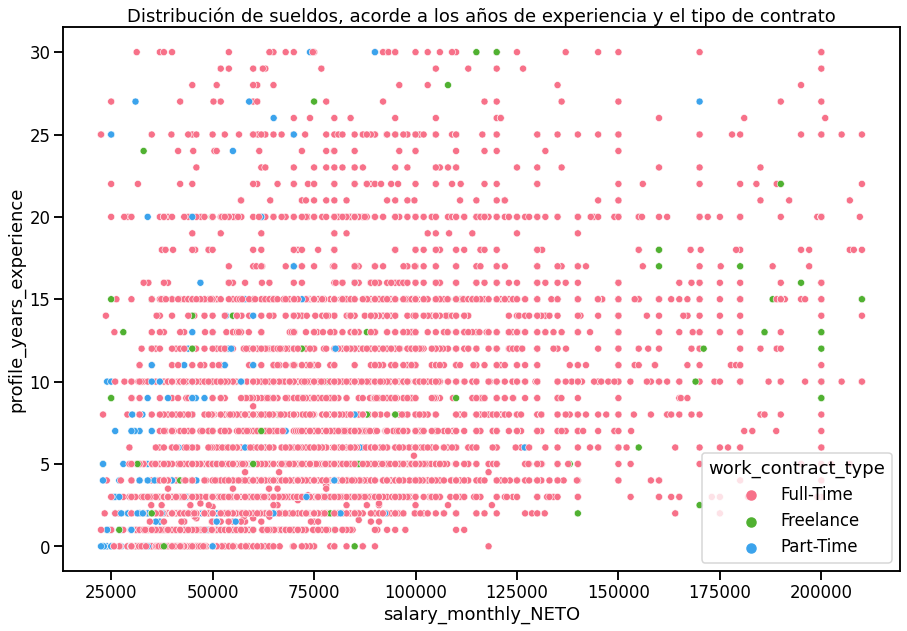

In [103]:
contract_type = ['Full-Time', 'Freelance', 'Part-Time']
df_filteder_contract = filtered_df[filtered_df['work_contract_type'].isin(contract_type)]
plt.subplots(figsize=(15,10))
max_profile_years_experience_allowed = df_filteder_contract['profile_years_experience'].quantile([.99]).values[0]
df_filteder_contract = df_filteder_contract[df_filteder_contract['profile_years_experience'] <= max_profile_years_experience_allowed]

plt.title("Distribución de sueldos, acorde a los años de experiencia y el tipo de contrato")
sns.scatterplot(data = df_filteder_contract, 
                x="salary_monthly_NETO",
                y="profile_years_experience",
                hue = "work_contract_type",
                palette="husl",
                s=50               )